# Predict basketball player efficiency ratings by using machine learning and Visual Studio Code

## Set up your local environment for data science coding

In [1]:
import pandas as pd

In [2]:
player_df = pd.read_csv("player_data.csv")
player_df.head()

,ID,points,possessions,team_pace,Unnamed: 4,Unnamed: 5,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,1893.0,1251.8,97.8,NaN,NaN,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,1386.0,1282.5,110.5,NaN,NaN,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,1405.0,1252.3,105.8,NaN,NaN,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,1282.0,1235.9,100.7,NaN,NaN,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,1721.0,1254.0,105.7,NaN,NaN,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38


## Data cleansing part 1 - Find missing values

In [3]:
player_df.isna().sum()

ID              0
points          3
possessions     3
team_pace       3
Unnamed: 4     46
Unnamed: 5     46
GP              7
MPG             6
TS%             1
AST             1
TO              1
USG             1
ORR             1
DRR             1
REBR            1
PER            10
dtype: int64

In [4]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           46 non-null     int64  
 1   points       43 non-null     float64
 2   possessions  43 non-null     float64
 3   team_pace    43 non-null     float64
 4   Unnamed: 4   0 non-null      float64
 5   Unnamed: 5   0 non-null      float64
 6   GP           39 non-null     float64
 7   MPG          40 non-null     float64
 8   TS%          45 non-null     float64
 9   AST          45 non-null     float64
 10  TO           45 non-null     float64
 11  USG          45 non-null     float64
 12  ORR          45 non-null     float64
 13  DRR          45 non-null     float64
 14  REBR         45 non-null     float64
 15  PER          36 non-null     float64
dtypes: float64(15), int64(1)
memory usage: 5.9 KB


## Data cleansing part 2 - Drop columns and rows

In [5]:
player_df.dropna(axis="columns", inplace=True, how="all")
player_df.isna().sum()

ID              0
points          3
possessions     3
team_pace       3
GP              7
MPG             6
TS%             1
AST             1
TO              1
USG             1
ORR             1
DRR             1
REBR            1
PER            10
dtype: int64

In [6]:
player_df

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,1893.0,1251.8,97.8,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,1386.0,1282.5,110.5,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,1405.0,1252.3,105.8,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,1282.0,1235.9,100.7,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,1721.0,1254.0,105.7,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38
5,6,1004.0,1322.4,102.1,57.0,36.3,0.574,20.3,13.5,31.0,1.2,20.5,3.4,9.83
6,7,1920.0,1207.6,109.8,55.0,37.0,0.573,26.0,13.1,30.7,0.0,10.3,-2.6,8.71
7,8,1353.0,1348.1,112.2,57.0,NaN,0.574,24.4,11.3,26.3,5.5,5.8,-2.2,NaN
8,9,NaN,NaN,NaN,54.0,31.7,0.577,24.6,14.4,35.7,2.5,14.1,-4.6,4.68
9,10,1468.0,1400.9,93.7,61.0,35.6,0.547,22.9,12.2,22.7,5.8,6.4,-2.9,NaN


Rows entfernen mit tresh(old) Parameter für Mindestanzahl nicht-leerer Spalten:

In [7]:
player_df.dropna(inplace=True, thresh=12)
player_df

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,1893.0,1251.8,97.8,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,1386.0,1282.5,110.5,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,1405.0,1252.3,105.8,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,1282.0,1235.9,100.7,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,1721.0,1254.0,105.7,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38
5,6,1004.0,1322.4,102.1,57.0,36.3,0.574,20.3,13.5,31.0,1.2,20.5,3.4,9.83
6,7,1920.0,1207.6,109.8,55.0,37.0,0.573,26.0,13.1,30.7,0.0,10.3,-2.6,8.71
7,8,1353.0,1348.1,112.2,57.0,NaN,0.574,24.4,11.3,26.3,5.5,5.8,-2.2,NaN
9,10,1468.0,1400.9,93.7,61.0,35.6,0.547,22.9,12.2,22.7,5.8,6.4,-2.9,NaN
10,11,1856.0,1303.8,93.4,55.0,33.6,0.563,28.9,14.7,26.7,1.4,17.3,4.3,9.67


Index reparieren

In [8]:
player_df.reset_index(drop=True, inplace=True)
player_df

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,1893.0,1251.8,97.8,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,1386.0,1282.5,110.5,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,1405.0,1252.3,105.8,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,1282.0,1235.9,100.7,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,1721.0,1254.0,105.7,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38
5,6,1004.0,1322.4,102.1,57.0,36.3,0.574,20.3,13.5,31.0,1.2,20.5,3.4,9.83
6,7,1920.0,1207.6,109.8,55.0,37.0,0.573,26.0,13.1,30.7,0.0,10.3,-2.6,8.71
7,8,1353.0,1348.1,112.2,57.0,NaN,0.574,24.4,11.3,26.3,5.5,5.8,-2.2,NaN
8,10,1468.0,1400.9,93.7,61.0,35.6,0.547,22.9,12.2,22.7,5.8,6.4,-2.9,NaN
9,11,1856.0,1303.8,93.4,55.0,33.6,0.563,28.9,14.7,26.7,1.4,17.3,4.3,9.67


In [9]:
player_df.describe()

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
count,42.000000,42.000000,42.000000,42.000000,36.000000,37.00000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,33.000000
mean,23.738095,1592.380952,1346.323810,106.526190,59.861111,35.27027,0.596357,26.221429,13.083333,30.478571,4.280952,14.850000,8.497619,22.594242
std,13.826555,351.876707,214.503887,6.676791,5.576239,1.91135,0.029284,5.199275,2.038282,4.919079,2.074025,7.277538,4.995876,7.255338
min,1.000000,183.000000,147.300000,89.700000,48.000000,30.50000,0.511000,14.800000,9.200000,16.500000,0.000000,0.900000,-2.900000,8.710000
25%,12.250000,1390.750000,1283.650000,102.400000,55.750000,34.10000,0.572250,23.275000,11.350000,26.975000,2.925000,8.475000,5.225000,20.120000
50%,23.500000,1680.000000,1369.800000,106.800000,60.500000,35.40000,0.604000,27.200000,13.500000,30.650000,4.650000,16.800000,9.150000,24.230000
75%,35.750000,1826.250000,1444.050000,111.950000,64.000000,36.90000,0.618750,30.550000,14.775000,34.850000,5.900000,20.325000,12.875000,28.380000
max,46.000000,2062.000000,1542.000000,118.800000,69.000000,38.80000,0.645000,33.200000,16.200000,36.700000,8.300000,29.400000,16.400000,34.260000


## Data exploration part 1 - Check for outliers

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

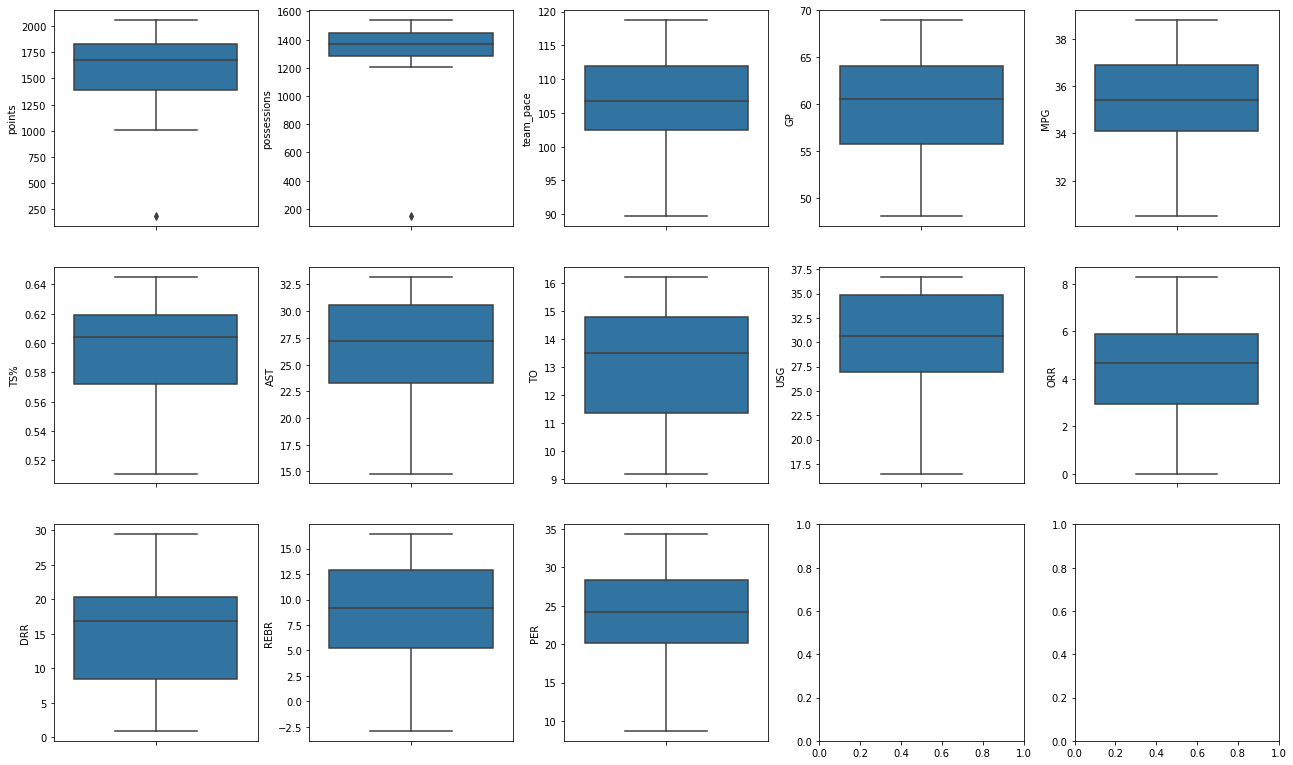

In [11]:
cols = list(player_df.iloc[:, 1:])

fig, axes = plt.subplots(3, 5, figsize=(18, 11))

fig.tight_layout(pad=2.0)

for i in range(len(cols)):
    sns.boxplot(ax=axes[i//5, i%5], y=player_df[cols[i]])

In [12]:
points_outlier = player_df['points'].idxmin()
points_outlier

35

In [13]:
possession_outlier = player_df['possessions'].idxmin()
possession_outlier

35

Die beiden Ausreißer bei Points und Possessions sind der gleiche Datensatz. => Hinfort damit!

In [14]:
player_df.drop(player_df.index[points_outlier], inplace=True)

player_df.tail(10)

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
31,36,2062.0,1505.7,111.5,NaN,37.0,0.620,29.8,15.6,36.2,4.9,23.9,14.7,27.86
32,37,1845.0,1435.7,113.1,69.0,36.9,0.634,33.2,14.0,36.5,4.1,21.5,16.4,34.26
33,38,1778.0,1526.4,109.3,66.0,34.9,0.612,30.6,15.9,35.9,5.5,18.8,13.7,28.65
34,39,1901.0,1444.1,109.7,67.0,36.5,0.609,27.2,14.8,35.5,5.0,21.8,8.9,20.12
36,41,2030.0,1431.0,112.3,68.0,37.0,0.618,32.5,15.3,34.5,5.7,15.7,13.2,30.07
37,42,1631.0,1465.7,110.1,66.0,37.5,0.613,28.4,14.4,35.7,6.5,20.7,14.0,28.40
38,43,1828.0,1507.2,112.7,64.0,36.5,0.618,31.3,14.0,34.9,5.9,21.3,14.5,NaN
39,44,1821.0,1443.7,118.8,66.0,36.6,0.609,27.3,13.5,35.8,7.0,23.8,11.5,22.96
40,45,1740.0,1443.9,114.1,68.0,37.1,0.611,26.6,15.2,29.3,8.3,17.7,11.1,21.22
41,46,1993.0,1459.0,112.5,NaN,36.9,0.627,30.4,15.0,33.7,6.3,19.3,14.1,28.76


In [15]:
player_df.reset_index(drop=True, inplace=True)

player_df.tail(10)

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
31,36,2062.0,1505.7,111.5,NaN,37.0,0.620,29.8,15.6,36.2,4.9,23.9,14.7,27.86
32,37,1845.0,1435.7,113.1,69.0,36.9,0.634,33.2,14.0,36.5,4.1,21.5,16.4,34.26
33,38,1778.0,1526.4,109.3,66.0,34.9,0.612,30.6,15.9,35.9,5.5,18.8,13.7,28.65
34,39,1901.0,1444.1,109.7,67.0,36.5,0.609,27.2,14.8,35.5,5.0,21.8,8.9,20.12
35,41,2030.0,1431.0,112.3,68.0,37.0,0.618,32.5,15.3,34.5,5.7,15.7,13.2,30.07
36,42,1631.0,1465.7,110.1,66.0,37.5,0.613,28.4,14.4,35.7,6.5,20.7,14.0,28.40
37,43,1828.0,1507.2,112.7,64.0,36.5,0.618,31.3,14.0,34.9,5.9,21.3,14.5,NaN
38,44,1821.0,1443.7,118.8,66.0,36.6,0.609,27.3,13.5,35.8,7.0,23.8,11.5,22.96
39,45,1740.0,1443.9,114.1,68.0,37.1,0.611,26.6,15.2,29.3,8.3,17.7,11.1,21.22
40,46,1993.0,1459.0,112.5,NaN,36.9,0.627,30.4,15.0,33.7,6.3,19.3,14.1,28.76


## Data exploration part 2 - Check the distribution of the data

In [16]:
player_df.isna().sum()

ID             0
points         0
possessions    0
team_pace      0
GP             6
MPG            5
TS%            0
AST            0
TO             0
USG            0
ORR            0
DRR            0
REBR           0
PER            9
dtype: int64

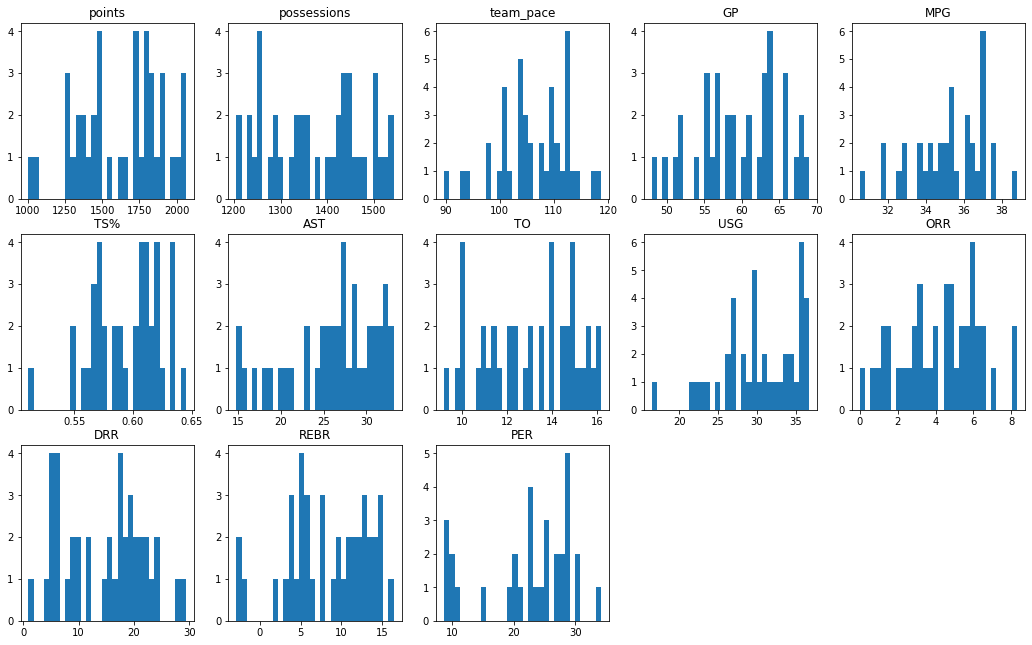

In [17]:
cols = list(player_df.iloc[:, 1:])

fig = plt.figure(figsize=(18, 11))
fig.tight_layout(pad=5.0)

for i in range(len(cols)):
    plt.subplot(3, 5, i+1)
    plt.hist(player_df[cols[i]], bins=30)
    plt.title(cols[i])

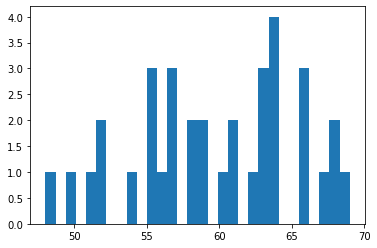

In [18]:
plt.hist(player_df['GP'], bins=30);

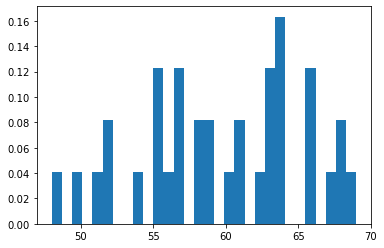

In [19]:
plt.hist(player_df['GP'], density=True, bins=30);

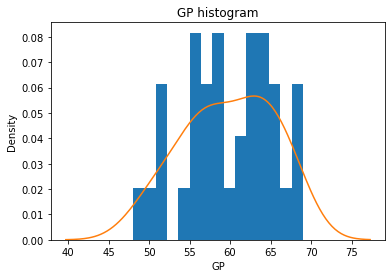

In [20]:
plt.hist(player_df['GP'], density=True, bins=15)
plt.title('GP histogram')
sns.kdeplot(player_df['GP']);

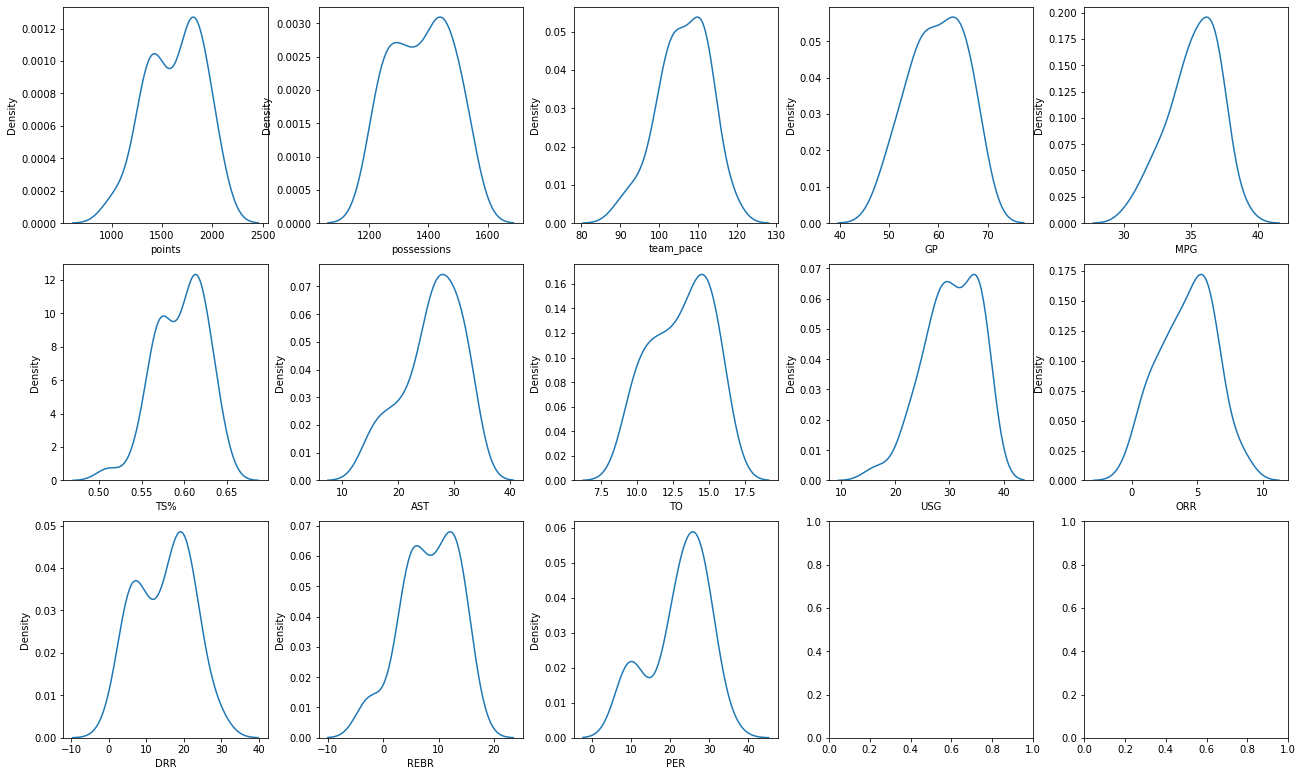

In [21]:
cols = list(player_df.iloc[:, 1:])

fig, axes = plt.subplots(3, 5, figsize=(18, 11))
fig.tight_layout(pad=2.0)

for i in range(len(cols)):
    sns.kdeplot(ax=axes[i//5, i%5], data=player_df[cols[i]])

## Data exploration part 3 - Discover data that represents more than one population

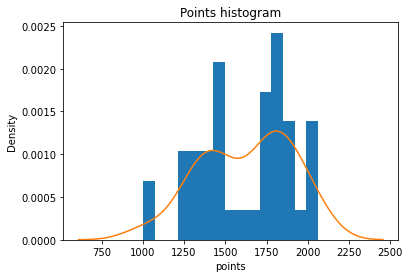

In [22]:
plt.hist(player_df['points'], density=True, bins=15)
plt.title('Points histogram')
sns.kdeplot(player_df['points']);

In [23]:
player_df.loc[player_df['points'] >= 1_600].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 40
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           23 non-null     int64  
 1   points       23 non-null     float64
 2   possessions  23 non-null     float64
 3   team_pace    23 non-null     float64
 4   GP           20 non-null     float64
 5   MPG          20 non-null     float64
 6   TS%          23 non-null     float64
 7   AST          23 non-null     float64
 8   TO           23 non-null     float64
 9   USG          23 non-null     float64
 10  ORR          23 non-null     float64
 11  DRR          23 non-null     float64
 12  REBR         23 non-null     float64
 13  PER          20 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 2.7 KB


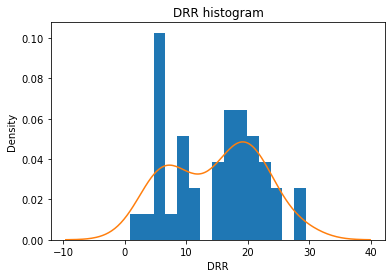

In [24]:
plt.hist(player_df['DRR'], density=True, bins=15)
plt.title('DRR histogram')
sns.kdeplot(player_df['DRR']);

In [25]:
player_df.loc[(player_df['points'] >= 1600) & (player_df['DRR'] >= 15)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 40
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           18 non-null     int64  
 1   points       18 non-null     float64
 2   possessions  18 non-null     float64
 3   team_pace    18 non-null     float64
 4   GP           15 non-null     float64
 5   MPG          16 non-null     float64
 6   TS%          18 non-null     float64
 7   AST          18 non-null     float64
 8   TO           18 non-null     float64
 9   USG          18 non-null     float64
 10  ORR          18 non-null     float64
 11  DRR          18 non-null     float64
 12  REBR         18 non-null     float64
 13  PER          16 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 2.1 KB


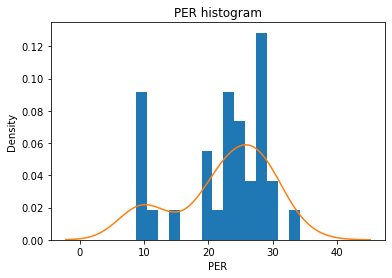

In [26]:
plt.hist(player_df['PER'], density=True, bins=15)
plt.title('PER histogram')
sns.kdeplot(player_df['PER']);

In [27]:
player_df.loc[
    (player_df['points'] >= 1600) & (player_df['DRR'] >= 15) & (player_df['PER'] >= 17)
]

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
26,31,2049.0,1434.0,110.0,64.0,38.8,0.619,31.5,14.9,35.5,8.3,17.6,12.8,28.44
27,32,1795.0,1481.8,112.1,62.0,35.4,0.608,31.9,14.5,32.0,6.5,22.5,12.9,23.34
28,33,1805.0,1509.9,108.6,64.0,35.4,0.622,27.9,13.9,36.0,5.9,27.7,12.2,22.41
30,35,1963.0,1539.1,117.4,NaN,NaN,0.633,32.3,16.2,34.0,5.9,19.8,13.1,27.16
31,36,2062.0,1505.7,111.5,NaN,37.0,0.620,29.8,15.6,36.2,4.9,23.9,14.7,27.86
32,37,1845.0,1435.7,113.1,69.0,36.9,0.634,33.2,14.0,36.5,4.1,21.5,16.4,34.26
33,38,1778.0,1526.4,109.3,66.0,34.9,0.612,30.6,15.9,35.9,5.5,18.8,13.7,28.65
34,39,1901.0,1444.1,109.7,67.0,36.5,0.609,27.2,14.8,35.5,5.0,21.8,8.9,20.12
35,41,2030.0,1431.0,112.3,68.0,37.0,0.618,32.5,15.3,34.5,5.7,15.7,13.2,30.07
36,42,1631.0,1465.7,110.1,66.0,37.5,0.613,28.4,14.4,35.7,6.5,20.7,14.0,28.40


In [28]:
player_df.loc[player_df['ID'] == 34]

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
29,34,1743.0,1422.4,112.9,64.0,36.3,0.619,30.9,15.6,34.5,5.9,18.9,14.8,NaN


## Data manipulation part 1 - Add qualifying player information

In [29]:
pop_list = [f"player{id_}" if id_ <= 30 else f"tune_squad{id_%30}" for id_ in player_df["ID"]]
player_df["player"] = pop_list
player_df.head(10)

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,player
0,1,1893.0,1251.8,97.8,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90,player1
1,2,1386.0,1282.5,110.5,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30,player2
2,3,1405.0,1252.3,105.8,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN,player3
3,4,1282.0,1235.9,100.7,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35,player4
4,5,1721.0,1254.0,105.7,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38,player5
5,6,1004.0,1322.4,102.1,57.0,36.3,0.574,20.3,13.5,31.0,1.2,20.5,3.4,9.83,player6
6,7,1920.0,1207.6,109.8,55.0,37.0,0.573,26.0,13.1,30.7,0.0,10.3,-2.6,8.71,player7
7,8,1353.0,1348.1,112.2,57.0,NaN,0.574,24.4,11.3,26.3,5.5,5.8,-2.2,NaN,player8
8,10,1468.0,1400.9,93.7,61.0,35.6,0.547,22.9,12.2,22.7,5.8,6.4,-2.9,NaN,player10
9,11,1856.0,1303.8,93.4,55.0,33.6,0.563,28.9,14.7,26.7,1.4,17.3,4.3,9.67,player11


In [30]:
column_list = list(player_df.iloc[:, :-1])

column_list.insert(1, 'player')

player_df = player_df[column_list]

player_df.head()

,ID,player,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,player1,1893.0,1251.8,97.8,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,player2,1386.0,1282.5,110.5,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,player3,1405.0,1252.3,105.8,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,player4,1282.0,1235.9,100.7,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,player5,1721.0,1254.0,105.7,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38


## Data manipulation part 2 - Impute missing values for columns

In [31]:
player_df.isna().sum()

ID             0
player         0
points         0
possessions    0
team_pace      0
GP             6
MPG            5
TS%            0
AST            0
TO             0
USG            0
ORR            0
DRR            0
REBR           0
PER            9
dtype: int64

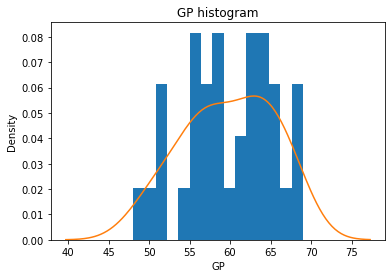

In [32]:
plt.hist(player_df['GP'], density=True, bins=15)
plt.title('GP histogram')
sns.kdeplot(player_df['GP']);

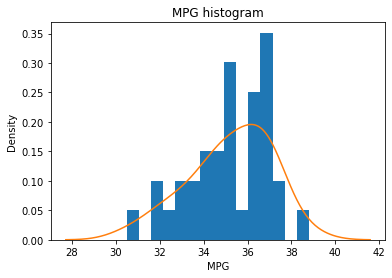

In [33]:
plt.hist(player_df['MPG'], density=True, bins=15)
plt.title('MPG histogram')
sns.kdeplot(player_df['MPG']);

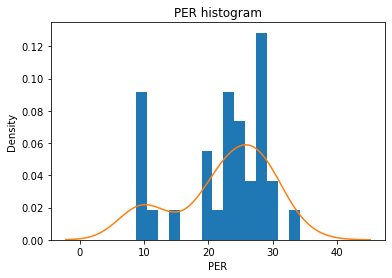

In [34]:
plt.hist(player_df['PER'], density=True, bins=15)
plt.title('PER histogram')
sns.kdeplot(player_df['PER']);

In [35]:
player_df[['GP','MPG']] = player_df[['GP','MPG']].fillna(value=player_df[['GP','MPG']].mean())

player_df.isna().sum()

ID             0
player         0
points         0
possessions    0
team_pace      0
GP             0
MPG            0
TS%            0
AST            0
TO             0
USG            0
ORR            0
DRR            0
REBR           0
PER            9
dtype: int64

## Data manipulation part 3 - Impute missing values by using machine learning

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [37]:
X = player_df.dropna(how='any').iloc[:, 5:-1].to_numpy()
y = player_df.dropna(how='any').iloc[:, -1]

In [38]:
X

array([[63.        , 33.9       ,  0.569     , 17.2       , 11.5       ,
        26.1       ,  4.7       , 23.3       ,  7.8       ],
       [58.        , 32.5       ,  0.511     , 24.8       ,  9.7       ,
        26.9       ,  6.1       ,  0.9       , 10.7       ],
       [54.        , 37.6       ,  0.636     , 29.5       , 11.        ,
        22.3       ,  4.8       ,  4.6       ,  5.6       ],
       [59.        , 30.5       ,  0.589     , 22.8       ,  9.9       ,
        24.6       ,  1.2       ,  8.4       , 12.1       ],
       [57.        , 36.3       ,  0.574     , 20.3       , 13.5       ,
        31.        ,  1.2       , 20.5       ,  3.4       ],
       [55.        , 37.        ,  0.573     , 26.        , 13.1       ,
        30.7       ,  0.        , 10.3       , -2.6       ],
       [55.        , 33.6       ,  0.563     , 28.9       , 14.7       ,
        26.7       ,  1.4       , 17.3       ,  4.3       ],
       [63.        , 32.8       ,  0.55      , 25.1       , 12

In [39]:
y

0     10.90
1     27.30
3     22.35
4     28.38
5      9.83
6      8.71
9      9.67
10    22.97
12    27.57
13     9.38
14     9.49
16    19.78
17    30.44
18    24.23
19    25.15
21    25.12
22    15.04
23    25.35
25    20.49
26    28.44
27    23.34
28    22.41
30    27.16
31    27.86
32    34.26
33    28.65
34    20.12
35    30.07
36    28.40
38    22.96
39    21.22
40    28.76
Name: PER, dtype: float64

Mean r2 score: 0.9995
10% of r2 scores are between 0.9985 and 0.9987
10% of r2 scores are between 0.9987 and 0.9988
10% of r2 scores are between 0.9995 and 0.9996
10% of r2 scores are between 0.9996 and 0.9997
60% of r2 scores are between 0.9997 and 0.9998


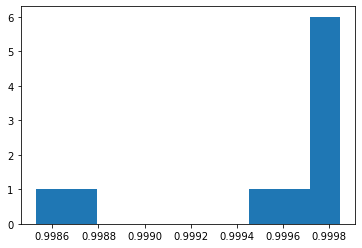

In [40]:
lin_reg = LinearRegression()

scores = cross_val_score(lin_reg, X, y, cv=10, scoring="r2")

entries, bin_edges, patches = plt.hist(scores, bins=10);

print('Mean r2 score: {:.4f}'.format(scores.mean()))
for i in range(len(entries)):
    if entries[i] > 0:
        print(
            '{:.0f}% of r2 scores are between {:.4f} and {:.4f}'.format(
                entries[i]*100/len(entries), 
                bin_edges[i], 
                bin_edges[i+1]
            )
        )

In [41]:
lin_reg.fit(X, y)

LinearRegression()

In [42]:
mask = player_df.isnull().any(axis=1)
mask

0     False
1     False
2      True
3     False
4     False
5     False
6     False
7      True
8      True
9     False
10    False
11     True
12    False
13    False
14    False
15     True
16    False
17    False
18    False
19    False
20     True
21    False
22    False
23    False
24     True
25    False
26    False
27    False
28    False
29     True
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37     True
38    False
39    False
40    False
dtype: bool

In [43]:
player_df.loc[mask].iloc[:, 5:-1]

,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR
2,55.000000,36.300000,0.605,25.7,13.9,28.1,4.5,4.9,1.8
7,57.000000,35.208333,0.574,24.4,11.3,26.3,5.5,5.8,-2.2
8,61.000000,35.600000,0.547,22.9,12.2,22.7,5.8,6.4,-2.9
11,59.771429,31.700000,0.584,32.4,14.7,16.5,3.2,19.0,4.1
15,59.771429,34.900000,0.603,26.2,11.1,36.7,3.0,14.3,5.3
20,61.000000,35.208333,0.645,20.6,13.1,31.5,4.0,12.0,5.2
24,48.000000,35.100000,0.569,19.0,10.9,29.2,4.6,17.7,5.2
29,64.000000,36.300000,0.619,30.9,15.6,34.5,5.9,18.9,14.8
37,64.000000,36.500000,0.618,31.3,14.0,34.9,5.9,21.3,14.5


In [44]:
player_df.loc[mask, 'PER'] = lin_reg.predict(player_df.loc[mask].iloc[:, 5:-1])
player_df.isna().sum()

ID             0
player         0
points         0
possessions    0
team_pace      0
GP             0
MPG            0
TS%            0
AST            0
TO             0
USG            0
ORR            0
DRR            0
REBR           0
PER            0
dtype: int64

In [45]:
player_df

,ID,player,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,player1,1893.0,1251.8,97.8,63.000000,33.900000,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.900000
1,2,player2,1386.0,1282.5,110.5,58.000000,32.500000,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.300000
2,3,player3,1405.0,1252.3,105.8,55.000000,36.300000,0.605,25.7,13.9,28.1,4.5,4.9,1.8,16.595759
3,4,player4,1282.0,1235.9,100.7,54.000000,37.600000,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.350000
4,5,player5,1721.0,1254.0,105.7,59.000000,30.500000,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.380000
5,6,player6,1004.0,1322.4,102.1,57.000000,36.300000,0.574,20.3,13.5,31.0,1.2,20.5,3.4,9.830000
6,7,player7,1920.0,1207.6,109.8,55.000000,37.000000,0.573,26.0,13.1,30.7,0.0,10.3,-2.6,8.710000
7,8,player8,1353.0,1348.1,112.2,57.000000,35.208333,0.574,24.4,11.3,26.3,5.5,5.8,-2.2,8.717454
8,10,player10,1468.0,1400.9,93.7,61.000000,35.600000,0.547,22.9,12.2,22.7,5.8,6.4,-2.9,3.115350
9,11,player11,1856.0,1303.8,93.4,55.000000,33.600000,0.563,28.9,14.7,26.7,1.4,17.3,4.3,9.670000


In [46]:
player_df.to_csv('player_data_final.csv', index=False)

# Use basketball stats to optimize game play with Visual Studio Code, inspired by SPACE JAM: A NEW LEGACY

## Set up your local environment for data science coding

In [47]:
player_df_final = pd.read_csv('player_data_final.csv')
player_df_final

,ID,player,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,player1,1893.0,1251.8,97.8,63.000000,33.900000,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.900000
1,2,player2,1386.0,1282.5,110.5,58.000000,32.500000,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.300000
2,3,player3,1405.0,1252.3,105.8,55.000000,36.300000,0.605,25.7,13.9,28.1,4.5,4.9,1.8,16.595759
3,4,player4,1282.0,1235.9,100.7,54.000000,37.600000,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.350000
4,5,player5,1721.0,1254.0,105.7,59.000000,30.500000,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.380000
5,6,player6,1004.0,1322.4,102.1,57.000000,36.300000,0.574,20.3,13.5,31.0,1.2,20.5,3.4,9.830000
6,7,player7,1920.0,1207.6,109.8,55.000000,37.000000,0.573,26.0,13.1,30.7,0.0,10.3,-2.6,8.710000
7,8,player8,1353.0,1348.1,112.2,57.000000,35.208333,0.574,24.4,11.3,26.3,5.5,5.8,-2.2,8.717454
8,10,player10,1468.0,1400.9,93.7,61.000000,35.600000,0.547,22.9,12.2,22.7,5.8,6.4,-2.9,3.115350
9,11,player11,1856.0,1303.8,93.4,55.000000,33.600000,0.563,28.9,14.7,26.7,1.4,17.3,4.3,9.670000


## Prepare data by adding row qualifiers

In [48]:
ts_df = player_df_final.iloc[26: , :]
ts_df

,ID,player,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
26,31,tune_squad1,2049.0,1434.0,110.0,64.000000,38.800000,0.619,31.5,14.9,35.5,8.3,17.6,12.8,28.440000
27,32,tune_squad2,1795.0,1481.8,112.1,62.000000,35.400000,0.608,31.9,14.5,32.0,6.5,22.5,12.9,23.340000
28,33,tune_squad3,1805.0,1509.9,108.6,64.000000,35.400000,0.622,27.9,13.9,36.0,5.9,27.7,12.2,22.410000
29,34,tune_squad4,1743.0,1422.4,112.9,64.000000,36.300000,0.619,30.9,15.6,34.5,5.9,18.9,14.8,29.853138
30,35,tune_squad5,1963.0,1539.1,117.4,59.771429,35.208333,0.633,32.3,16.2,34.0,5.9,19.8,13.1,27.160000
31,36,tune_squad6,2062.0,1505.7,111.5,59.771429,37.000000,0.620,29.8,15.6,36.2,4.9,23.9,14.7,27.860000
32,37,tune_squad7,1845.0,1435.7,113.1,69.000000,36.900000,0.634,33.2,14.0,36.5,4.1,21.5,16.4,34.260000
33,38,tune_squad8,1778.0,1526.4,109.3,66.000000,34.900000,0.612,30.6,15.9,35.9,5.5,18.8,13.7,28.650000
34,39,tune_squad9,1901.0,1444.1,109.7,67.000000,36.500000,0.609,27.2,14.8,35.5,5.0,21.8,8.9,20.120000
35,41,tune_squad11,2030.0,1431.0,112.3,68.000000,37.000000,0.618,32.5,15.3,34.5,5.7,15.7,13.2,30.070000


In [49]:
ts_name_df = pd.read_csv('tune_squad.csv', sep='\t')
ts_name_df

,ID,player
0,31,Sylvester
1,32,Marvin the Martian
2,33,Road Runner
3,34,Foghorn Leghorn
4,35,Bugs Bunny
5,36,Elmer Fudd
6,37,Lola Bunny
7,38,Porky Pig
8,39,Tasmanian Devil
9,40,Yosemite Sam


In [50]:
ts_df = pd.merge(ts_df, ts_name_df, on='ID', how='left', suffixes=('_type', '_name'))
ts_df.head()

,ID,player_type,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,player_name
0,31,tune_squad1,2049.0,1434.0,110.0,64.000000,38.800000,0.619,31.5,14.9,35.5,8.3,17.6,12.8,28.440000,Sylvester
1,32,tune_squad2,1795.0,1481.8,112.1,62.000000,35.400000,0.608,31.9,14.5,32.0,6.5,22.5,12.9,23.340000,Marvin the Martian
2,33,tune_squad3,1805.0,1509.9,108.6,64.000000,35.400000,0.622,27.9,13.9,36.0,5.9,27.7,12.2,22.410000,Road Runner
3,34,tune_squad4,1743.0,1422.4,112.9,64.000000,36.300000,0.619,30.9,15.6,34.5,5.9,18.9,14.8,29.853138,Foghorn Leghorn
4,35,tune_squad5,1963.0,1539.1,117.4,59.771429,35.208333,0.633,32.3,16.2,34.0,5.9,19.8,13.1,27.160000,Bugs Bunny


In [51]:
column_list = list(ts_df)

player_name = column_list.pop()
column_list[1] = player_name

ts_df = ts_df[column_list]
ts_df.head()

,ID,player_name,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,31,Sylvester,2049.0,1434.0,110.0,64.000000,38.800000,0.619,31.5,14.9,35.5,8.3,17.6,12.8,28.440000
1,32,Marvin the Martian,1795.0,1481.8,112.1,62.000000,35.400000,0.608,31.9,14.5,32.0,6.5,22.5,12.9,23.340000
2,33,Road Runner,1805.0,1509.9,108.6,64.000000,35.400000,0.622,27.9,13.9,36.0,5.9,27.7,12.2,22.410000
3,34,Foghorn Leghorn,1743.0,1422.4,112.9,64.000000,36.300000,0.619,30.9,15.6,34.5,5.9,18.9,14.8,29.853138
4,35,Bugs Bunny,1963.0,1539.1,117.4,59.771429,35.208333,0.633,32.3,16.2,34.0,5.9,19.8,13.1,27.160000


## Create a machine learning model based on player data

In [52]:
game_stat_cols = list(ts_df.iloc[:, 7:-1])
game_stat_stdevs = []

for stat in game_stat_cols:
    game_stat_stdevs.append(ts_df[stat].std())

stdev_s = pd.Series(game_stat_stdevs, index=game_stat_cols)
stdev_s

TS%     0.008262
AST     2.140494
TO      0.797197
USG     1.892718
ORR     1.139465
DRR     3.017962
REBR    1.802564
dtype: float64

In [53]:
from sklearn.linear_model import LinearRegression
from numpy.random import randn

In [54]:
X = player_df_final.iloc[:, 7:-1].to_numpy()
y = player_df_final.iloc[:, -1]

In [55]:
X

array([[ 0.569, 17.2  , 11.5  , 26.1  ,  4.7  , 23.3  ,  7.8  ],
       [ 0.511, 24.8  ,  9.7  , 26.9  ,  6.1  ,  0.9  , 10.7  ],
       [ 0.605, 25.7  , 13.9  , 28.1  ,  4.5  ,  4.9  ,  1.8  ],
       [ 0.636, 29.5  , 11.   , 22.3  ,  4.8  ,  4.6  ,  5.6  ],
       [ 0.589, 22.8  ,  9.9  , 24.6  ,  1.2  ,  8.4  , 12.1  ],
       [ 0.574, 20.3  , 13.5  , 31.   ,  1.2  , 20.5  ,  3.4  ],
       [ 0.573, 26.   , 13.1  , 30.7  ,  0.   , 10.3  , -2.6  ],
       [ 0.574, 24.4  , 11.3  , 26.3  ,  5.5  ,  5.8  , -2.2  ],
       [ 0.547, 22.9  , 12.2  , 22.7  ,  5.8  ,  6.4  , -2.9  ],
       [ 0.563, 28.9  , 14.7  , 26.7  ,  1.4  , 17.3  ,  4.3  ],
       [ 0.55 , 25.1  , 12.9  , 27.2  ,  2.1  , 12.1  , 11.4  ],
       [ 0.584, 32.4  , 14.7  , 16.5  ,  3.2  , 19.   ,  4.1  ],
       [ 0.569, 28.6  , 12.2  , 36.2  ,  4.9  ,  6.   ,  7.4  ],
       [ 0.59 , 26.5  ,  9.9  , 29.7  ,  3.1  , 29.4  ,  5.5  ],
       [ 0.572, 15.5  , 16.2  , 23.8  ,  3.4  , 15.4  ,  6.   ],
       [ 0.603, 26.2  , 1

In [56]:
y

0     10.900000
1     27.300000
2     16.595759
3     22.350000
4     28.380000
5      9.830000
6      8.710000
7      8.717454
8      3.115350
9      9.670000
10    22.970000
11     3.400862
12    27.570000
13     9.380000
14     9.490000
15    22.613222
16    19.780000
17    30.440000
18    24.230000
19    25.150000
20    21.260042
21    25.120000
22    15.040000
23    25.350000
24    12.926847
25    20.490000
26    28.440000
27    23.340000
28    22.410000
29    29.853138
30    27.160000
31    27.860000
32    34.260000
33    28.650000
34    20.120000
35    30.070000
36    28.400000
37    29.094310
38    22.960000
39    21.220000
40    28.760000
Name: PER, dtype: float64

In [57]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [63]:
print("Iteration #", "high PER", "low PER", sep="\t")

# Run the simulation 10 times.
for i in range(10):

    # Define an empty temporary DataFrame for each iteration.
    # The columns of this DataFrame are the player stats and the index is the players' names.
    game_df = pd.DataFrame(columns=game_stat_cols, index=list(ts_df['player_name']))
    
    for stat in game_stat_cols:
        # Each player's stats are used to generate a random value for each iteration.
        game_df[stat] = list(ts_df[stat] + randn(len(ts_df)) * stdev_s[stat])
    
    # Use the fitted model to predict players' PERs based on the randomized data.
    game_df['PER'] = lin_reg.predict(game_df)

    print(f"Iteration {i+1}", game_df['PER'].idxmax(), game_df['PER'].idxmin(), sep="\t")

Iteration #	high PER	low PER
Iteration 1	Porky Pig	Tasmanian Devil
Iteration 2	Lola Bunny	Marvin the Martian
Iteration 3	Daffy Duck	Tweety
Iteration 4	Lola Bunny	Road Runner
Iteration 5	Lola Bunny	Tasmanian Devil
Iteration 6	Gossamer	Penelope
Iteration 7	Lola Bunny	Penelope
Iteration 8	Daffy Duck	Penelope
Iteration 9	Lola Bunny	Tweety
Iteration 10	Lola Bunny	Tasmanian Devil


## Use machine learning and standard deviation to create fictional game data

In [64]:
# Initialize four empty DataFrames, one for each 12-minute period.
number_of_iterations = 4
df_list = [pd.DataFrame(columns=game_stat_cols, index=list(ts_df['player_name'])) for i in range(number_of_iterations)]

# For each period, generate randomized player data and predict the PER.
# Use the model fitted earlier.
for df in df_list:
    for stat in game_stat_cols:
        df[stat] = list(ts_df[stat] + randn(len(ts_df)) * stdev_s[stat])
    df['PER'] = lin_reg.predict(df)

# Concatenate the DataFrames and make the players' names the index.
game_df = pd.concat(df_list)
game_df.rename_axis('player_name', inplace=True)

# Create another index for the period in question.
minutes = [(x // len(ts_df)) * 12 for x in range(len(game_df))]
game_df['minutes'] = minutes
game_df.set_index('minutes', append=True, inplace=True)
game_df = game_df.swaplevel()

game_df

TS%        AST         TO        USG  \
minutes player_name                                                     
0       Sylvester           0.630421  32.880610  15.241639  37.299647   
        Marvin the Martian  0.603652  34.136008  14.793271  33.821223   
        Road Runner         0.626549  25.998360  13.233663  32.143766   
        Foghorn Leghorn     0.629847  29.676457  15.397791  35.071071   
        Bugs Bunny          0.634214  28.960496  17.096807  33.125685   
        Elmer Fudd          0.629324  32.731718  15.490486  41.096347   
        Lola Bunny          0.631683  33.857374  13.465008  34.944940   
        Porky Pig           0.606120  31.612039  15.733759  31.798412   
        Tasmanian Devil     0.597793  33.286899  14.834782  34.359304   
        Gossamer            0.617210  28.747213  15.907404  34.940096   
        Granny              0.607181  24.186207  13.498789  32.431192   
        Wile E. Coyote      0.633936  28.192756  14.391307  35.528789   
        Tweety              0.618305  27.815652  13.935887  36.734598   
        Penelope            0.619900  25.179971  15.675642  29.992899   
        Daffy Duck          0.618115  29.259942  15.815163  36.722336   
12      Sylvester           0.611083  34.146659  15.723535  36.779158   
        Marvin the Martian  0.622074  32.995515  12.401721  32.030683   
        Road Runner         0.610325  28.788177  14.333851  34.658964   
        Foghorn Leghorn     0.628194  29.142332  15.613917  32.753130   
        Bugs Bunny          0.625137  30.881809  15.982871  32.755281   
        Elmer Fudd          0.627391  25.862210  15.788474  37.205479   
        Lola Bunny          0.621287  31.761106  13.209386  33.789719   
        Porky Pig           0.632858  28.289995  15.512696  33.807204   
        Tasmanian Devil     0.605454  25.042140  14.365581  31.872543   
        Gossamer            0.621377  30.707120  14.943437  33.637139   
        Granny              0.606863  29.545739  15.052322  33.706881   
        Wile E. Coyote      0.619121  32.631108  14.036746  34.599186   
        Tweety              0.625963  24.011388  12.827317  38.681369   
        Penelope            0.616055  27.794082  14.851474  29.808684   
        Daffy Duck          0.632029  34.152559  14.521870  34.828092   
24      Sylvester           0.621696  29.881261  16.054064  35.435828   
        Marvin the Martian  0.616119  32.677140  13.914815  31.282423   
        Road Runner         0.624215  25.431644  13.954250  35.970117   
        Foghorn Leghorn     0.613085  31.730154  16.295537  38.222826   
        Bugs Bunny          0.630132  30.077762  16.664308  35.534993   
        Elmer Fudd          0.624954  27.783281  15.621132  35.815231   
        Lola Bunny          0.632683  30.561300  14.964875  36.759114   
        Porky Pig           0.613246  34.625202  14.602457  37.085769   
        Tasmanian Devil     0.617683  29.393296  13.532888  32.628450   
        Gossamer            0.621976  35.145746  15.881960  34.948262   
        Granny              0.615151  27.206090  12.884406  35.560222   
        Wile E. Coyote      0.619842  32.929939  14.317226  36.552577   
        Tweety              0.604896  28.044908  13.323374  38.217368   
        Penelope            0.602973  23.979379  14.109014  26.826119   
        Daffy Duck          0.628845  30.068824  15.761854  31.847017   
36      Sylvester           0.624530  31.815041  15.810206  35.823454   
        Marvin the Martian  0.608403  32.804576  14.181781  29.858094   
        Road Runner         0.619158  29.326567  13.734915  35.928903   
        Foghorn Leghorn     0.616440  30.639562  16.389207  36.329857   
        Bugs Bunny          0.624973  31.353768  15.773788  35.363116   
        Elmer Fudd          0.611613  34.684480  15.349712  34.804549   
        Lola Bunny          0.653870  35.688906  13.971590  39.152959   
        Porky Pig           0.603631  31.530181  15.762920  34.965633   
        Tasmanian 

In [65]:
game_df.to_csv('game_stats.csv')